In [3]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder


In [6]:
#Get the weather data by round number
laps_files = []
for year in range(2022, 2025):
    file_name = glob.glob(f'../data/{year}/*_laps.csv')
    laps_files.extend(file_name)

print(laps_files)

['../data/2022/2022_round_14_laps.csv', '../data/2022/2022_round_15_laps.csv', '../data/2022/2022_round_20_laps.csv', '../data/2022/2022_round_21_laps.csv', '../data/2022/2022_round_8_laps.csv', '../data/2022/2022_round_9_laps.csv', '../data/2022/2022_round_2_laps.csv', '../data/2022/2022_round_3_laps.csv', '../data/2022/2022_round_5_laps.csv', '../data/2022/2022_round_4_laps.csv', '../data/2022/2022_round_13_laps.csv', '../data/2022/2022_round_12_laps.csv', '../data/2022/2022_round_19_laps.csv', '../data/2022/2022_round_18_laps.csv', '../data/2022/2022_round_1_laps.csv', '../data/2022/2022_round_17_laps.csv', '../data/2022/2022_round_16_laps.csv', '../data/2022/2022_round_10_laps.csv', '../data/2022/2022_round_11_laps.csv', '../data/2022/2022_round_6_laps.csv', '../data/2022/2022_round_7_laps.csv', '../data/2023/2023_round_4_laps.csv', '../data/2023/2023_round_5_laps.csv', '../data/2023/2023_round_15_laps.csv', '../data/2023/2023_round_14_laps.csv', '../data/2023/2023_round_21_laps.cs

In [7]:
def extract_year_round_number(file_name):
    base_name = os.path.splitext(os.path.basename(file_name))[0]
    parts = base_name.split("_")
    return int(parts[0]), int(parts[2])

In [8]:
data_points = []
for csv_file in laps_files:
    year, round_number = extract_year_round_number(csv_file)
    print(f"Processing Round {round_number}")
    try:
        df = pd.read_csv(csv_file)
        # Ensure Stint is integer, converting non-null values and handling errors
        df['Stint'] = pd.to_numeric(df['Stint'], errors='coerce').astype('Int64')
        # Ensure TyreLife is numeric, allowing NaN
        df['TyreLife'] = pd.to_numeric(df['TyreLife'], errors='coerce')
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")
        continue
    
    # Group by Driver
    for driver, group in df.groupby('Driver'):
        try:
            # Filter for lap 1 in stint 1
            stint1_lap1 = group[(group['LapNumber'] == 1) & (group['Stint'] == 1)]
            if stint1_lap1.empty:
                print(f"Warning: No lap 1 in stint 1 for driver {driver} in Round {round_number}")
                continue
            
            # Get starting tire compound and tyre life
            starting_compound = stint1_lap1['Compound'].iloc[0]
            tyre_life = stint1_lap1['TyreLife'].iloc[0]
            if pd.isna(tyre_life):
                print(f"Warning: Invalid TyreLife for driver {driver} in Round {round_number}")
                continue
            
            # Calculate first stint length (last lap of stint 1)
            stint1 = group[group['Stint'] == 1]
            if stint1.empty:
                print(f"Warning: No stint 1 data for driver {driver} in Round {round_number}")
                continue
            first_stint_length = stint1['LapNumber'].max()
            if pd.isna(first_stint_length):
                print(f"Warning: Invalid stint length for driver {driver} in Round {round_number}")
                continue
            
            # Store the data point
            data_points.append({
                'Year': year,
                'RoundNumber': round_number,
                'Driver': driver,
                'StartingCompound': starting_compound,
                'StartingTyreLife': tyre_life,
                'TyreLifeAtEnd': tyre_life + first_stint_length,
                'FirstStintLength': first_stint_length
            })
        except KeyError as e:
            print(f"Error: Missing column {e} in {csv_file} for driver {driver}")
            continue
        except Exception as e:
            print(f"Error processing driver {driver} in Round {round_number}: {e}")
            continue


Processing Round 14
Processing Round 15
Processing Round 20
Processing Round 21
Processing Round 8
Processing Round 9
Processing Round 2
Processing Round 3
Processing Round 5
Processing Round 4
Processing Round 13
Processing Round 12
Processing Round 19
Processing Round 18
Processing Round 1
Processing Round 17
Processing Round 16
Processing Round 10
Processing Round 11
Processing Round 6
Processing Round 7
Processing Round 4
Processing Round 5
Processing Round 15
Processing Round 14
Processing Round 21
Processing Round 20
Processing Round 12
Processing Round 13
Processing Round 18
Processing Round 19
Processing Round 9
Processing Round 8
Processing Round 3
Processing Round 2
Processing Round 16
Processing Round 17
Processing Round 7
Processing Round 6
Processing Round 1
Processing Round 11
Processing Round 10
Processing Round 18
Processing Round 19
Processing Round 12
Processing Round 13
Processing Round 1
Processing Round 6
Processing Round 7
Processing Round 15
Processing Round 14
P

In [9]:
data_df = pd.DataFrame(data_points)
data_df.to_csv('processed_first_stint_data.csv', index=False)

In [10]:
#Get the weather data by round number
weather_files = []
for year in range(2022, 2025):
    file_name = glob.glob(f'../data/{year}/*_weather.csv')
    weather_files.extend(file_name)

print(weather_files)


['../data/2022/2022_round_18_weather.csv', '../data/2022/2022_round_11_weather.csv', '../data/2022/2022_round_6_weather.csv', '../data/2022/2022_round_3_weather.csv', '../data/2022/2022_round_14_weather.csv', '../data/2022/2022_round_9_weather.csv', '../data/2022/2022_round_17_weather.csv', '../data/2022/2022_round_5_weather.csv', '../data/2022/2022_round_12_weather.csv', '../data/2022/2022_round_20_weather.csv', '../data/2022/2022_round_2_weather.csv', '../data/2022/2022_round_15_weather.csv', '../data/2022/2022_round_10_weather.csv', '../data/2022/2022_round_7_weather.csv', '../data/2022/2022_round_19_weather.csv', '../data/2022/2022_round_21_weather.csv', '../data/2022/2022_round_4_weather.csv', '../data/2022/2022_round_13_weather.csv', '../data/2022/2022_round_16_weather.csv', '../data/2022/2022_round_1_weather.csv', '../data/2022/2022_round_8_weather.csv', '../data/2023/2023_round_17_weather.csv', '../data/2023/2023_round_6_weather.csv', '../data/2023/2023_round_3_weather.csv', '.

In [12]:
results = []
for weather_file in weather_files:
    print(weather_file)
    year, round_number = extract_year_round_number(weather_file)
    print(round_number)
    print(f"Processing weather for Round {round_number}")
    try:
        df = pd.read_csv(weather_file)
        
        avg_air_temp = df['AirTemp'].mean()
        avg_humidity = df['Humidity'].mean()
        avg_pressure = df['Pressure'].mean()
        avg_rainfall = df['Rainfall'].mean()
        avg_track_temp = df['TrackTemp'].mean()
        avg_wind_direction = np.degrees(np.arctan2(np.sin(np.radians(df['WindDirection'])).mean(),
                                                  np.cos(np.radians(df['WindDirection'])).mean()))
        avg_wind_speed = df['WindSpeed'].mean()
        
        result = {
                'year': year,
                'round_num': round_number,
                'avg_air_temp': avg_air_temp,
                'avg_humidity': avg_humidity,
                'avg_pressure': avg_pressure,
                'avg_rainfall': avg_rainfall,
                'avg_track_temp': avg_track_temp,
                'avg_wind_direction': avg_wind_direction,
                'avg_wind_speed': avg_wind_speed
            }
            
        results.append(result)
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")
        continue
    
weather = pd.DataFrame(results)
weather.to_csv('processed_weather_data.csv', index=False)

print(weather.iloc[1])

../data/2022/2022_round_18_weather.csv
18
Processing weather for Round 18
../data/2022/2022_round_11_weather.csv
11
Processing weather for Round 11
../data/2022/2022_round_6_weather.csv
6
Processing weather for Round 6
../data/2022/2022_round_3_weather.csv
3
Processing weather for Round 3
../data/2022/2022_round_14_weather.csv
14
Processing weather for Round 14
../data/2022/2022_round_9_weather.csv
9
Processing weather for Round 9
../data/2022/2022_round_17_weather.csv
17
Processing weather for Round 17
../data/2022/2022_round_5_weather.csv
5
Processing weather for Round 5
../data/2022/2022_round_12_weather.csv
12
Processing weather for Round 12
../data/2022/2022_round_20_weather.csv
20
Processing weather for Round 20
../data/2022/2022_round_2_weather.csv
2
Processing weather for Round 2
../data/2022/2022_round_15_weather.csv
15
Processing weather for Round 15
../data/2022/2022_round_10_weather.csv
10
Processing weather for Round 10
../data/2022/2022_round_7_weather.csv
7
Processing we

In [13]:
# Merge data_df and weather on Year and RoundNumber/round_num
merged_df = pd.merge(
    data_df,
    weather,
    left_on=['Year', 'RoundNumber'],
    right_on=['year', 'round_num'],
    how='inner'
)

# Drop redundant columns
merged_df = merged_df.drop(columns=['year', 'round_num'])

# Save merged data
merged_df.to_csv('merged_tire_weather_data.csv', index=False)

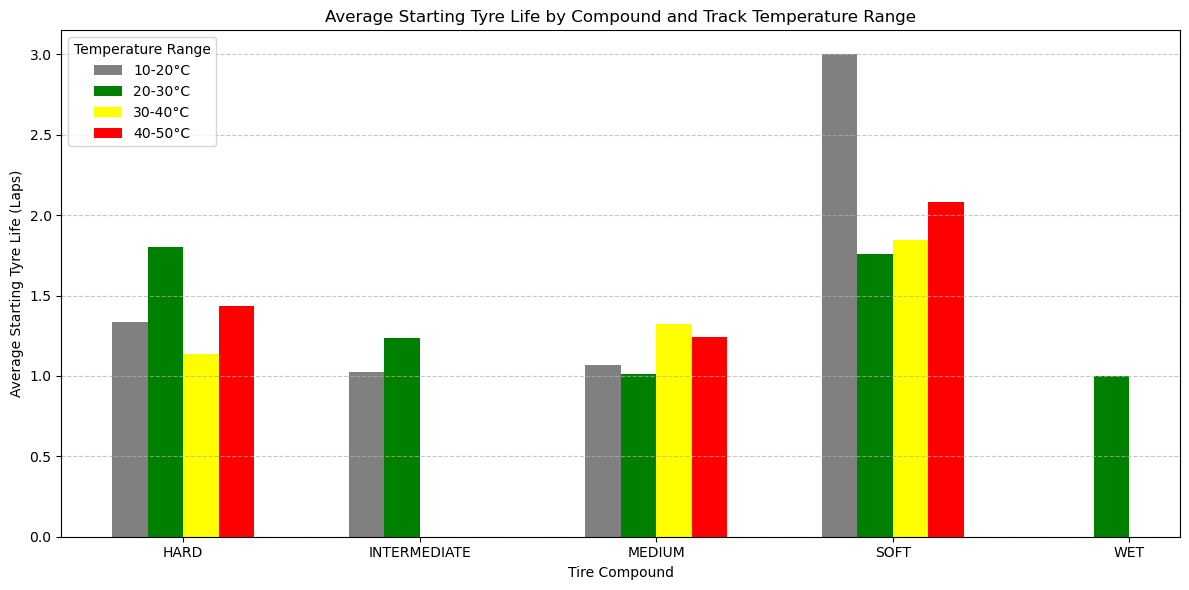

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
temp_bins = [10, 20, 30, 40, 50]  # Adjust based on your data range
temp_labels = ['10-20°C', '20-30°C', '30-40°C', '40-50°C']
merged_df['TempRange'] = pd.cut(merged_df['avg_track_temp'], bins=temp_bins, labels=temp_labels)

compounds = sorted(merged_df['StartingCompound'].unique())
n_ranges = len(temp_labels)
index = np.arange(len(compounds))
bar_width = 0.15

for i, temp_range in enumerate(temp_labels):
    means = [merged_df[(merged_df['StartingCompound'] == compound) & 
                      (merged_df['TempRange'] == temp_range)]['StartingTyreLife'].mean() 
             for compound in compounds]
    ax.bar(index + i * bar_width, means, bar_width, label=temp_range, 
           color=[colors.get(compound, 'blue') for compound in compounds][i % len(compounds)])

ax.set_xticks(index + bar_width * (n_ranges - 1) / 2)
ax.set_xticklabels(compounds)
ax.set_title('Average Starting Tyre Life by Compound and Track Temperature Range')
ax.set_xlabel('Tire Compound')
ax.set_ylabel('Average Starting Tyre Life (Laps)')
ax.legend(title='Temperature Range')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


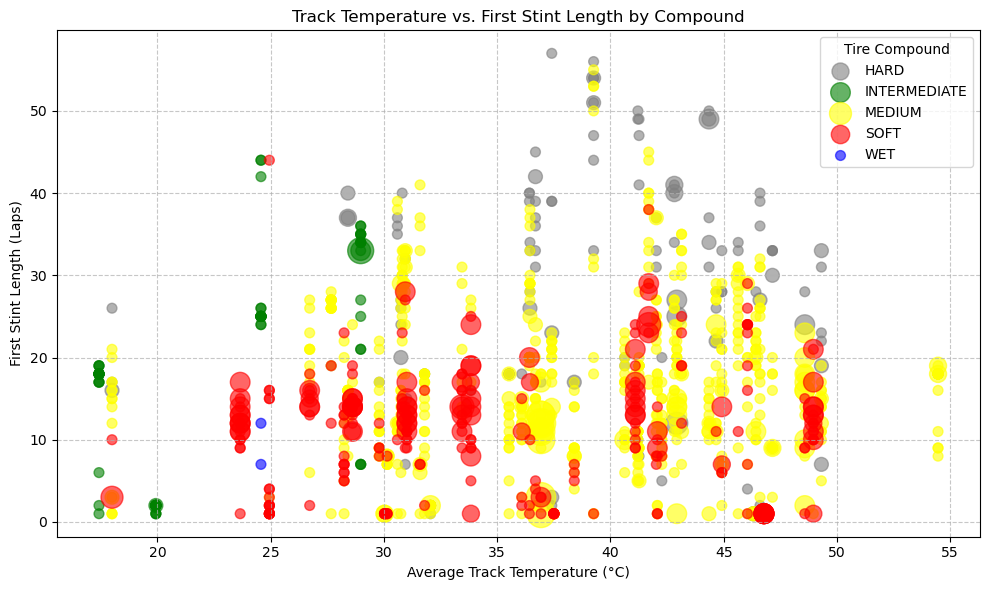

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
for compound in compounds:
    subset = merged_df[merged_df['StartingCompound'] == compound]
    ax.scatter(subset['avg_track_temp'], subset['FirstStintLength'], 
               c=colors.get(compound, 'blue'), label=compound, 
               s=subset['StartingTyreLife'] * 50, alpha=0.6)

ax.set_title('Track Temperature vs. First Stint Length by Compound')
ax.set_xlabel('Average Track Temperature (°C)')
ax.set_ylabel('First Stint Length (Laps)')
ax.legend(title='Tire Compound')
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

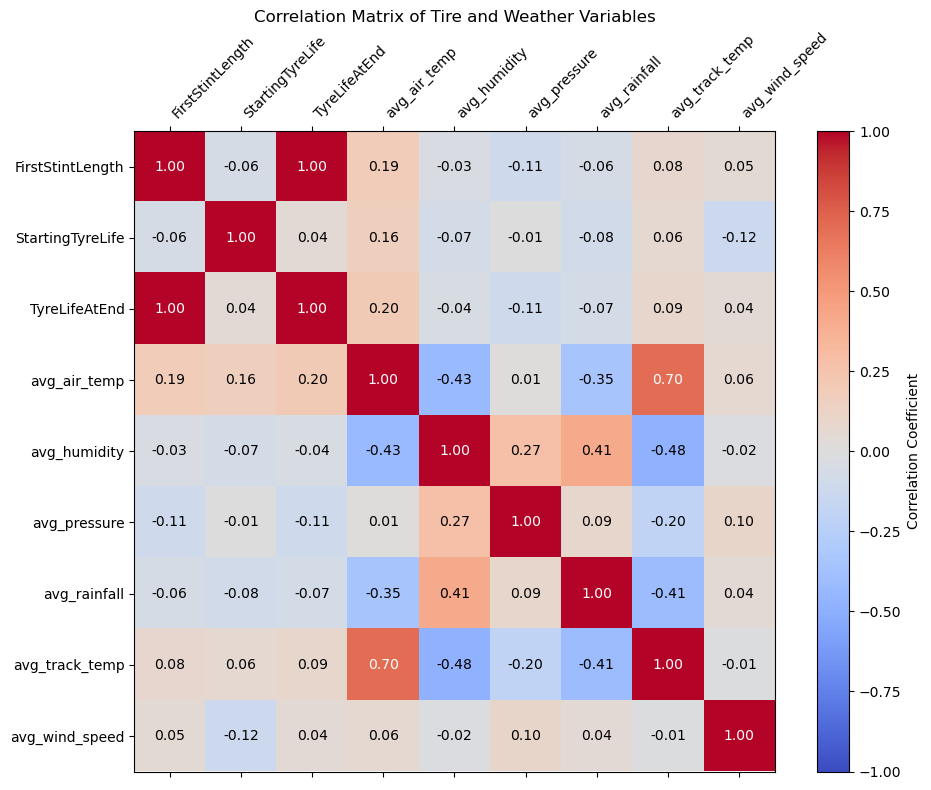

In [17]:
numeric_cols = ['FirstStintLength', 'StartingTyreLife', 'TyreLifeAtEnd', 'avg_air_temp', 
                'avg_humidity', 'avg_pressure', 'avg_rainfall', 'avg_track_temp', 'avg_wind_speed']
corr_matrix = merged_df[numeric_cols].corr().values
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax, label='Correlation Coefficient')
ax.set_xticks(np.arange(len(numeric_cols)))
ax.set_yticks(np.arange(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=45, ha='left')
ax.set_yticklabels(numeric_cols)
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        ax.text(j, i, f'{corr_matrix[i, j]:.2f}', ha='center', va='center', 
                color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')
ax.set_title('Correlation Matrix of Tire and Weather Variables')
plt.tight_layout()
plt.show()

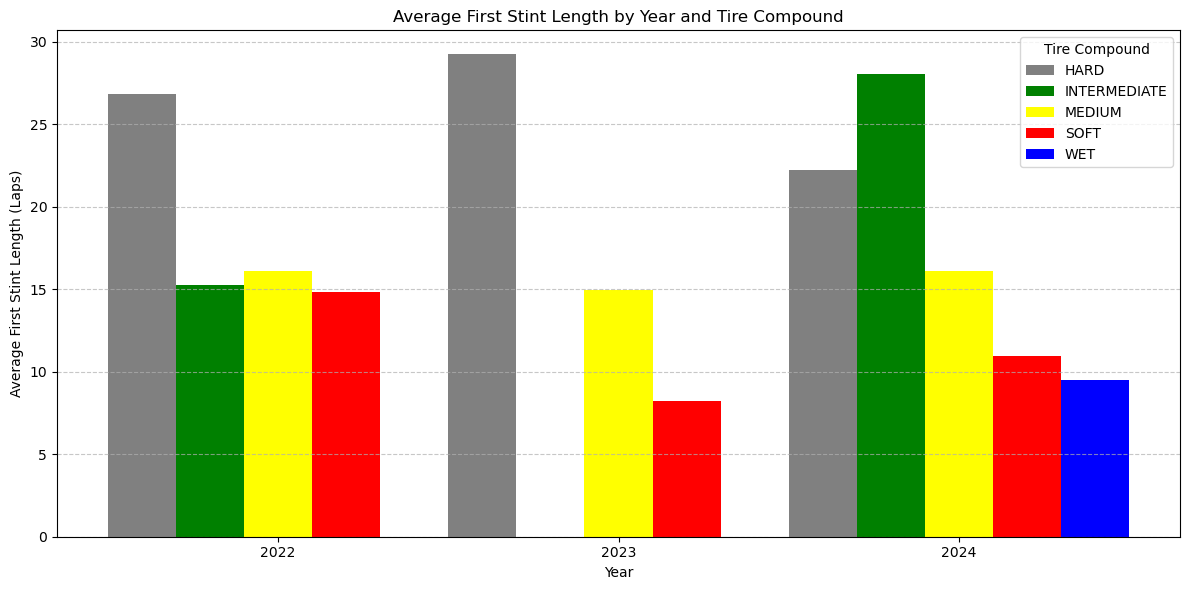

In [21]:
# Plot 4: Bar Plot of Average First Stint Length by Year and Compound
fig, ax = plt.subplots(figsize=(12, 6))
years = sorted(merged_df['Year'].unique())
x = np.arange(len(years))
width = 0.2

for i, compound in enumerate(compounds):
    means = [merged_df[(merged_df['Year'] == year) & 
                      (merged_df['StartingCompound'] == compound)]['FirstStintLength'].mean() 
             for year in years]
    ax.bar(x + i * width, means, width, label=compound, color=colors.get(compound, 'blue'))

ax.set_xticks(x + width * (len(compounds) - 1) / 2)
ax.set_xticklabels(years)
ax.set_title('Average First Stint Length by Year and Tire Compound')
ax.set_xlabel('Year')
ax.set_ylabel('Average First Stint Length (Laps)')
ax.legend(title='Tire Compound')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()